## Exercise 1

2 19.28147006790397
3 524.0567775860644
4 15513.73873892924
5 476607.2502425855
6 14951058.642254734
7 475367356.7446793
8 15257575538.060041
9 493153755941.02344
10 16024416987428.36
11 522270131654983.3
12 1.7515952300879806e+16
13 3.1883950689209334e+18
14 6.200786281355982e+17
15 3.67568286586649e+17
16 7.046389953630175e+17
17 1.249010044779401e+18
18 2.2477642911280653e+18
19 6.472700911391398e+18


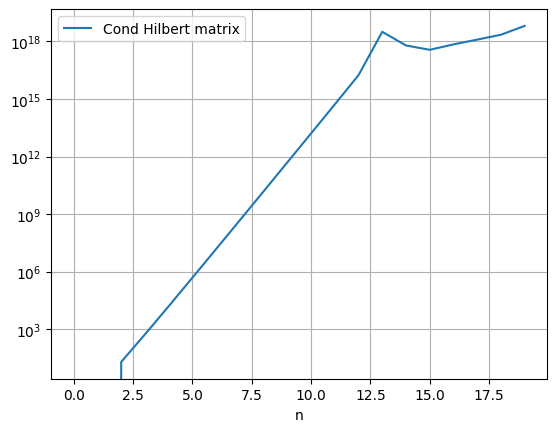

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def Hilbert_Matrix(n):

  H = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      H[i, j] = 1 / (i + j + 1)

  return H


N = 20
condH = np.zeros(N)
for n in range(2,N):
  H = Hilbert_Matrix(n)
  condH[n]=np.linalg.cond(H)
  print(n, np.linalg.cond(H))

# Display results
plt.figure()  # numerical solution
plt.semilogy(condH, label='Cond Hilbert matrix')
plt.title('')
plt.xlabel('n')
plt.grid()
plt.legend(loc='best')



## Exercise 3


0 [4.16333634e-17]
1 [ 4.16333634e-17 -3.64575828e-17]
2 [ 4.16333634e-17 -3.64575828e-17  1.51981775e+00]
3 [ 4.16333634e-17 -3.64575828e-17  1.51981775e+00 -1.72046140e-16]
4 [ 4.16333634e-17 -3.64575828e-17  1.51981775e+00 -1.72046140e-16
 -5.82446703e-01]


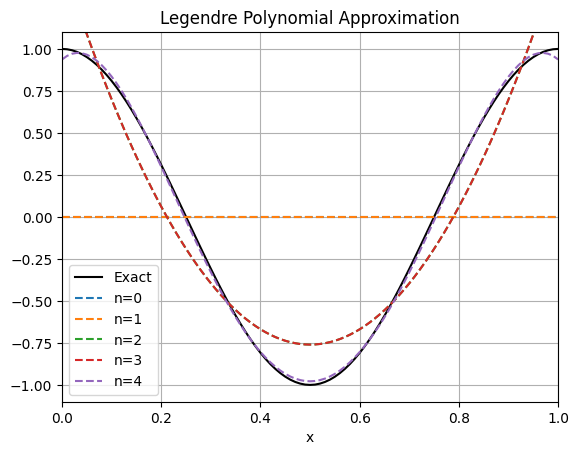

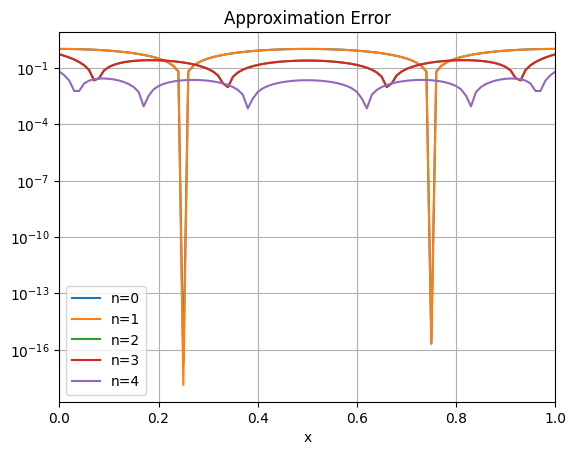

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre
from scipy.integrate import quad

# Inputs
n = 4
x0, xf = 0, 1
phi = lambda x, n: legendre(n)((2*x-(x0 + xf))/(xf-x0))
f = lambda x: np.cos(2*np.pi*x)

x = np.linspace(x0, xf, 101) # eval. points

# Initialize plots
plt.figure(1)  # Numerical solution
plt.plot(x, f(x), 'k-', label='Exact')
plt.figure(2)  # Error

for k in range(n + 1):
    c = np.zeros(k + 1)
    for j in range(k + 1):
        aux = lambda x: f(x)*phi(x, j)
        c[j] = quad(aux, x0, xf, epsabs=1e-12)[0]
        c[j] *= (2*j+1)/(xf-x0)
    print(k,c)

    # Construct approximant
    v = np.zeros_like(x)
    for j in range(k + 1):
        v += c[j] * phi(x, j)

    # Plot approximation
    plt.figure(1)
    plt.plot(x, v, '--', label=f'n={k}')

    # Plot error
    plt.figure(2)
    plt.semilogy(x, abs(f(x) - v), label=f'n={k}')

# Final plot settings
plt.figure(1)
plt.axis([0, 1, -1.1, 1.1])
plt.title('Legendre Polynomial Approximation')
plt.xlabel('x')
plt.legend()
plt.grid(True)

plt.figure(2)
plt.title('Approximation Error')
plt.xlabel('x')
plt.xlim([0, 1])
plt.legend()
plt.grid(True)

plt.show()


## Exercise  5

2 [ 0.1110974  -0.25930954  0.26736529]
3 [ 0.1110974  -0.25930954  0.26736529 -0.18915403]


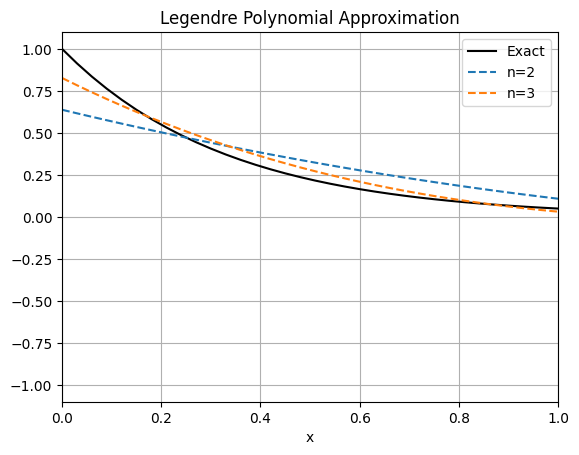

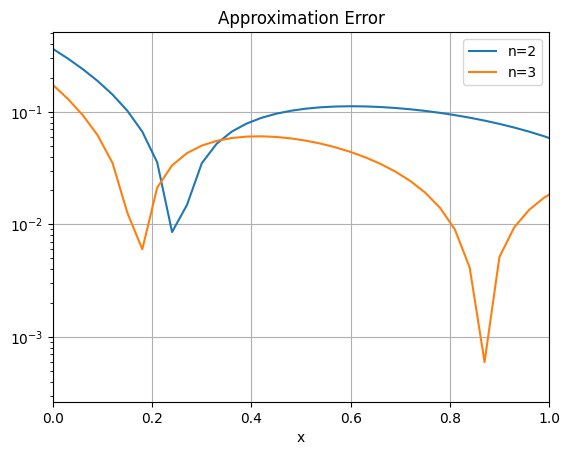

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre
from scipy.integrate import quad

# Inputs
n = 3
x0, xf = 0, 3
phi = lambda x, n: legendre(n)((2*x - (x0 + xf)) / (xf - x0))
f = lambda x: np.exp(-3*x)

x = np.linspace(x0, xf, 101)

# Initialize plots
plt.figure(1)  # Numerical solution
plt.plot(x, f(x), 'k-', label='Exact')
plt.figure(2)  # Error

for k in range(2,n + 1):
    c = np.zeros(k + 1)
    for j in range(k + 1):
        aux = lambda x: f(x)*phi(x, j)
        c[j] = quad(aux, x0, xf, epsabs=1e-12)[0]
        c[j] *= (2*j+1)/(xf-x0)


    print(k,c)
    # Construct approximant
    v = np.zeros_like(x)
    for j in range(k + 1):
        v += c[j] * phi(x, j)

    # Plot approximation
    plt.figure(1)
    plt.plot(x, v, '--', label=f'n={k}')

    # Plot error
    plt.figure(2)
    plt.semilogy(x, abs(f(x) - v), label=f'n={k}')

# Final plot settings
plt.figure(1)
plt.axis([0, 1, -1.1, 1.1])
plt.title('Legendre Polynomial Approximation')
plt.xlabel('x')
plt.legend()
plt.grid(True)

plt.figure(2)
plt.title('Approximation Error')
plt.xlabel('x')
plt.xlim([0, 1])
plt.legend()
plt.grid(True)

plt.show()


## Exercise 7

<ipython-input-44-f56afa88f4a1>:19: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  c[j] = quad(integrand, 0, np.inf, epsabs=1e-12, epsrel=0)[0]


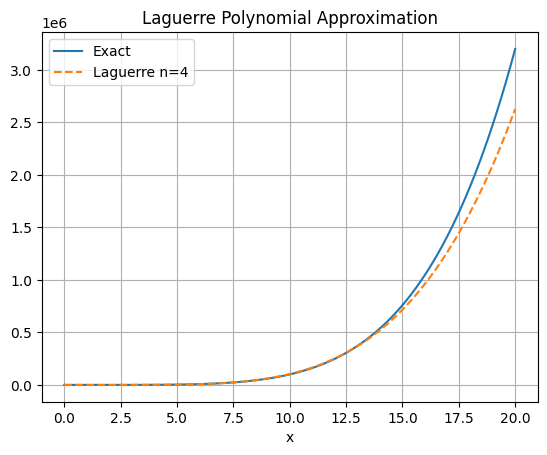

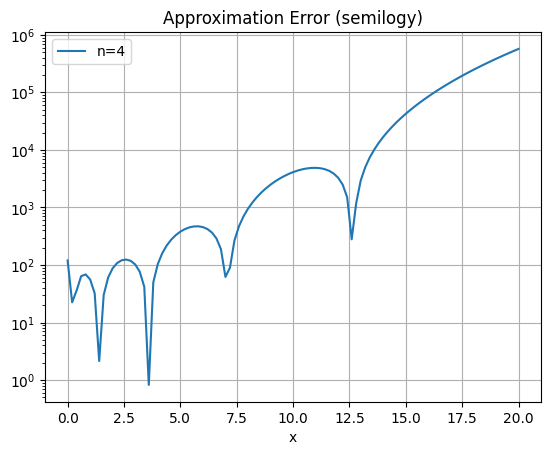

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import eval_laguerre
from scipy.integrate import quad

# Inputs
w = lambda x: np.exp(-x)           # Weight function
#f = lambda x: np.cos(x)            # Target function
#f = lambda x: np.exp(-x)          # Target function
f = lambda x: x**5          # Target function
n = 4                             # Max degree of Laguerre polynomial

x = np.linspace(0, 20, 101)        # Evaluation points

# Compute coefficients c_j
c = np.zeros(n + 1)
for j in range(n + 1):
    integrand = lambda x: w(x) * eval_laguerre(j, x) * f(x)
    c[j] = quad(integrand, 0, np.inf, epsabs=1e-12, epsrel=0)[0]

# Construct approximant
v = np.zeros_like(x)
for j in range(n + 1):
    v += c[j] * eval_laguerre(j, x)

# Display results
plt.figure(1)
plt.plot(x, f(x), label='Exact')
plt.plot(x, v, '--', label=f'Laguerre n={n}')
plt.title('Laguerre Polynomial Approximation')
plt.xlabel('x')
plt.legend()
plt.grid(True)

plt.figure(2)
plt.semilogy(x, np.abs(f(x) - v), label=f'n={n}')
plt.title('Approximation Error (semilogy)')
plt.xlabel('x')
plt.legend()
plt.grid(True)

plt.show()


## Exercise 8

### Part (a)

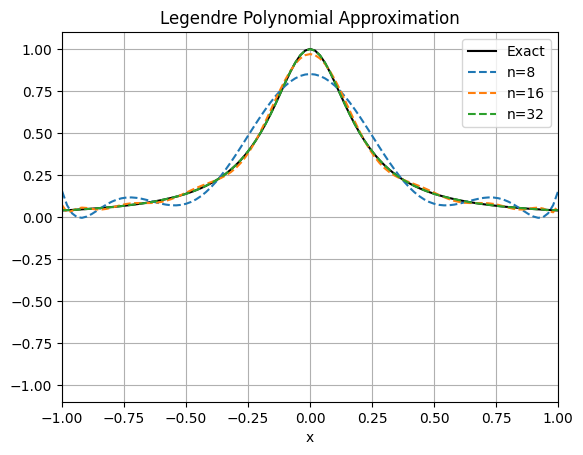

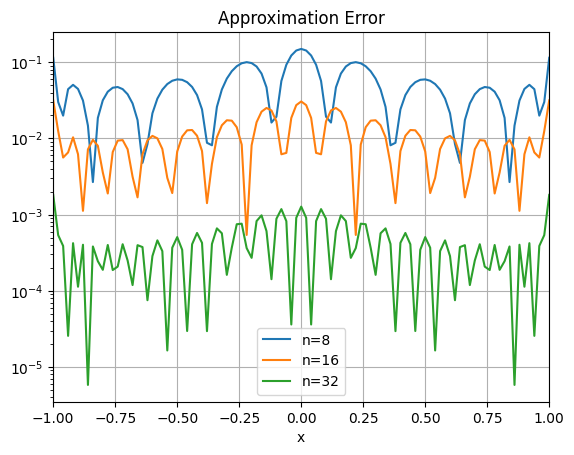

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre
from scipy.integrate import quad

# Inputs
x0, xf = -1, 1
n_max = 32
f = lambda x: 1 / (1 + 25 * x**2)

x = np.linspace(x0, xf, 101)

# Initialize plots
plt.figure(1)  # Numerical solution
plt.plot(x, f(x), 'k-', label='Exact')
plt.figure(2)  # Error

# Loop over different degrees (from 2 to n_max)
for k in [8, 16, 32]:
    c = np.zeros(k + 1)
    for j in range(k + 1):
        aux = lambda x: f(x) * legendre(j)((2 * x - (x0 + xf)) / (xf - x0))
        c[j] = quad(aux, x0, xf, epsabs=1e-12)[0]
        c[j] *= (2 * j + 1) / (xf - x0)  # Normalize

    # Construct approximant
    v = np.zeros_like(x)
    for j in range(k + 1):
        v += c[j] * legendre(j)((2 * x - (x0 + xf)) / (xf - x0))

    # Plot approximation
    plt.figure(1)
    plt.plot(x, v, '--', label=f'n={k}')

    # Plot error
    plt.figure(2)
    plt.semilogy(x, np.abs(f(x) - v), label=f'n={k}')

# Final plot settings
plt.figure(1)
plt.axis([-1, 1, -1.1, 1.1])
plt.title('Legendre Polynomial Approximation')
plt.xlabel('x')
plt.legend()
plt.grid(True)

plt.figure(2)
plt.title('Approximation Error')
plt.xlabel('x')
plt.xlim([-1, 1])
plt.legend()
plt.grid(True)

plt.show()


### Part (b)

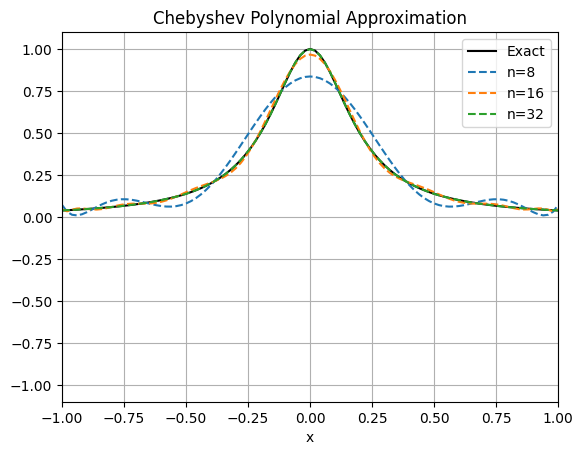

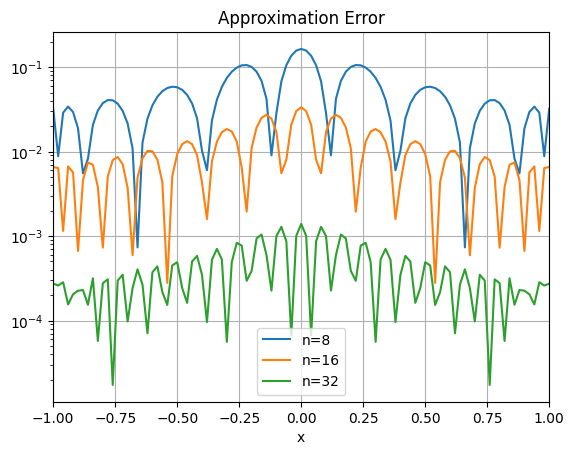

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define Chebyshev polynomial T_n(x) recursively
def chebyshevT(n, x):
    """ Compute the n-th Chebyshev polynomial of the first kind T_n(x) """
    if n == 0:
        return np.ones_like(x)  # T_0(x) = 1
    elif n == 1:
        return x  # T_1(x) = x
    else:
        T_0 = np.ones_like(x)
        T_1 = x
        for k in range(2, n + 1):
            T_next = 2 * x * T_1 - T_0  # T_{n+1}(x) = 2*x*T_n(x) - T_{n-1}(x)
            T_0, T_1 = T_1, T_next
        return T_1

# Inputs
x0, xf = -1, 1
n_max = 32
f = lambda x: 1 / (1 + 25 * x**2)  # Target function
w = lambda x: 1 / np.sqrt(1 - x**2)  # Weight function for Chebyshev

# Generate x values for plotting
x = np.linspace(x0, xf, 101)

# Initialize plots
plt.figure(1)  # Numerical solution
plt.plot(x, f(x), 'k-', label='Exact')
plt.figure(2)  # Error

# Loop over different degrees (from 2 to n_max)
for k in [8, 16, 32]:
    c = np.zeros(k + 1)

    # Compute Chebyshev coefficients (with normalization)
    B = np.pi*np.diag(0.5*np.ones(k + 1))
    B[0, 0] = np.pi

    for j in range(k + 1):
        aux = lambda x: f(x) * chebyshevT(j, x) * w(x)
        c[j] = quad(aux, x0, xf, epsabs=1e-12, epsrel=0)[0]

    # Solve for coefficients using the matrix B
    c = np.linalg.solve(B, c)

    # Construct approximant
    v = np.zeros_like(x)
    for j in range(k + 1):
        v += c[j] * chebyshevT(j, x)

    # Plot approximation
    plt.figure(1)
    plt.plot(x, v, '--', label=f'n={k}')

    # Plot error
    plt.figure(2)
    plt.semilogy(x, np.abs(f(x) - v), label=f'n={k}')

# Final plot
plt.figure(1)
plt.axis([-1, 1, -1.1, 1.1])
plt.title('Chebyshev Polynomial Approximation')
plt.xlabel('x')
plt.legend()
plt.grid(True)

plt.figure(2)
plt.title('Approximation Error')
plt.xlabel('x')
plt.xlim([-1, 1])
plt.legend()
plt.grid(True)

plt.show()
